Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [5]:
NAME = "Ananya Roy"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.** 
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. 
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. 
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. 
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [7]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [13]:
# Merge the data frames
merged_df = pd.merge(df_data, df_target, left_index=True, right_index=True)

# Display the merged data frame
merged_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [17]:
merged_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


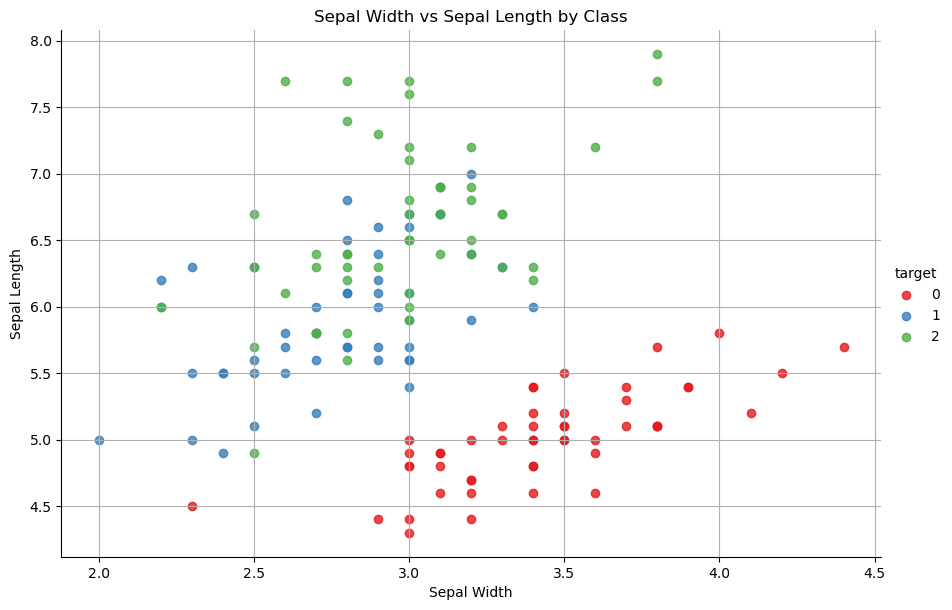

In [19]:
# Create the scatter plot of sepal width vs sepal length
#plt.figure(figsize=(5,3))
sns.lmplot(data=merged_df, 
           x='sepal_width', 
           y='sepal_length', 
           hue='target', 
           fit_reg=False,  # Disable regression line
           palette='Set1',  # Choose color palette
           height=6, 
           aspect=1.5)

# Add labels and title
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Sepal Width vs Sepal Length by Class')

# Show the plot
plt.grid(True)
plt.show()

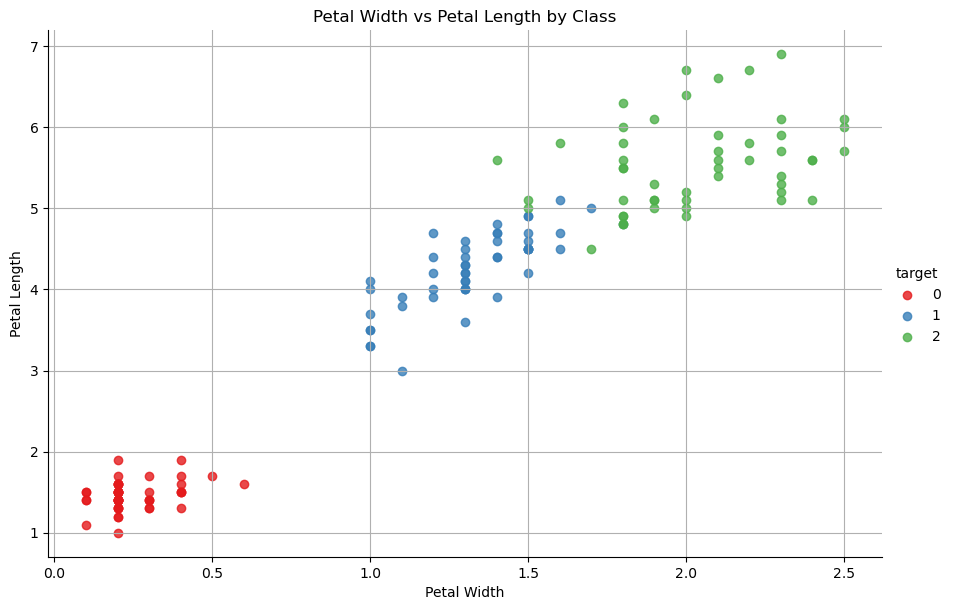

In [21]:
# Create the scatter plot of petal width vs petal length

sns.lmplot(data=merged_df, 
           x='petal_width', 
           y='petal_length', 
           hue='target', 
           fit_reg=False,  # Disable regression line
           palette='Set1',  # Choose color palette
           height=6, 
           aspect=1.5)

# Add labels and title
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Width vs Petal Length by Class')

# Show the plot
plt.grid(True)
plt.show()


In [63]:
# convert extracted columns into arrays for classification
X = merged_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values  
Y = merged_df['target'].values

print("\nFeature array (X) shape:", X.shape)
print("Response array (Y) shape:", Y.shape)


Feature array (X) shape: (150, 4)
Response array (Y) shape: (150,)


In [69]:
# divide the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=42)


print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 105
Test set size: 45


In [71]:
# Instantiate the KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
# Predict the classes for the test set
Y_pred = knn.predict(X_test)

# Calculate and display accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nAccuracy of the KNN model: {accuracy:.2f}")

# Count correct and incorrect predictions
correct_predictions = np.count_nonzero(Y_test == Y_pred)
incorrect_predictions = np.count_nonzero(Y_test != Y_pred)

print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")


Accuracy of the KNN model: 1.00
Correct predictions: 45
Incorrect predictions: 0


In [ ]:
# Generate 10 random train/test splits for each value of k= 1,3, 5, 7, 10, 20, 30, 40, and 50
# Fit the model for each split and generate predictions
# Average the accuracy score for each k
# Calculate the average number of correct predictions for each k as well
# Plot the accuracy score for different values of k. What conclusion can you make based on the graph?

In [75]:
# Values of k
k_values = [1, 3, 5, 7, 10, 20, 30, 40, 50]

# Initialize lists
avg_accuracy_scores = []
avg_correct_predictions = []

# Number of splits
num_splits = 10

# Total number of samples in the test set (30%)
test_set_size = int(0.3 * len(Y)) 

In [77]:
# Loop through k = 1, 3, 5, 7, 10, 20, 30, 40, 50

for k in k_values:
    accuracy_scores = []
    correct_predictions = []

    # Perform 10 random train/test splits for each k
    for _ in range(num_splits):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                            test_size=0.3, 
                                                            random_state=None)
        
        # Instantiate and fit the KNN model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        
        # Make predictions
        Y_pred = knn.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracy_scores.append(accuracy)
        
        # Calculate the number of correct predictions
        correct_count = np.count_nonzero(Y_test == Y_pred)
        correct_predictions.append(correct_count)
    
    # Calculate the average accuracy and correct predictions for this k
    avg_accuracy_scores.append(np.mean(accuracy_scores))
    avg_correct_predictions.append(np.mean(correct_predictions))


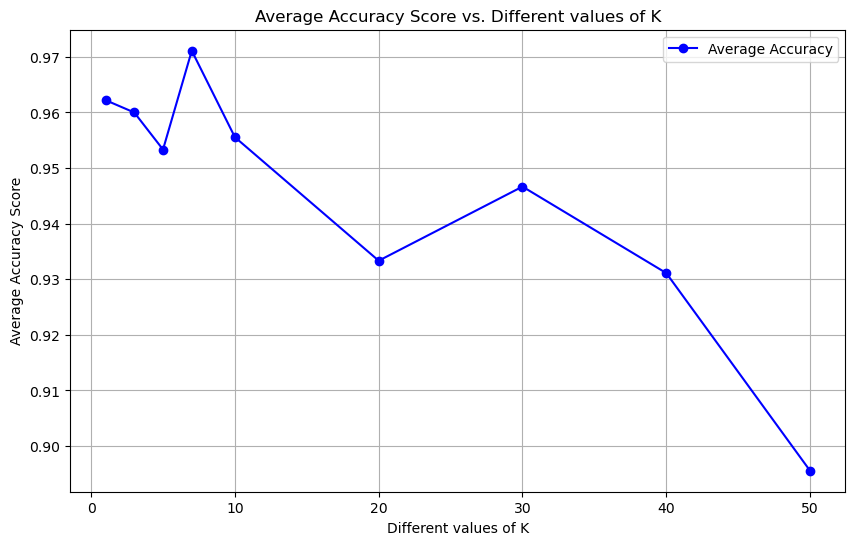

In [81]:
# Plot accuracy scores for different values of k

plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_accuracy_scores, marker='o', linestyle='-', color='b', label='Average Accuracy')
plt.xlabel('Different values of K')
plt.ylabel('Average Accuracy Score')
plt.title('Average Accuracy Score vs. Different values of K')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Observations from the Average Accuracy Trend:

# For small values of K (e.g., k=1), the model may have high variance, leading to potential overfitting. 
# For K = 5 and 10, the accuracy stabilizes and reaches an optimal range.
# For higher values of K (e.g., K = 40 and 50), the accuracy reduced due to underfitting.

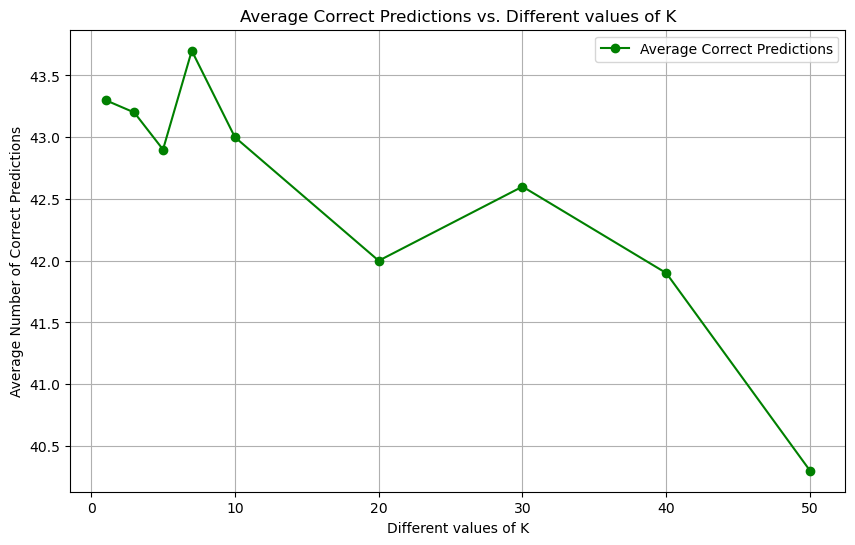

In [83]:
# Plot correct predictions for different values of k

plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_correct_predictions, marker='o', linestyle='-', color='g', label='Average Correct Predictions')
plt.xlabel('Different values of K')
plt.ylabel('Average Number of Correct Predictions')
plt.title('Average Correct Predictions vs. Different values of K')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Observations on Average Correct Predictions Trend:

# The average number of correct predictions rend is similar to the accuracy trend since accuracy is directly related to correct predictions.
# Optimal k: From the graph, it can be found that moderate values like k=5 to k=10 yield the best balance between bias and variance, 
# providing stable and high accuracy.